<a href="https://colab.research.google.com/github/manyasahay/Computer-Vision/blob/main/image_aligning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
ref = cv2.imread('/content/page1.JPG')
to_align = cv2.imread('/content/page2.JPG')

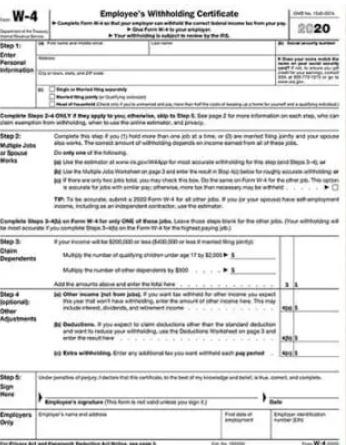

In [ ]:
cv2_imshow(ref)

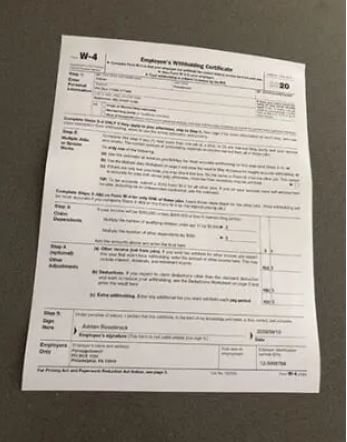

In [ ]:
cv2_imshow(to_align)

In [ ]:
ref_gray = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)


In [ ]:
to_align_gray = cv2.cvtColor(to_align, cv2.COLOR_BGR2GRAY)

In [ ]:
# ref_resize = cv2.resize(ref_gray, (100, 200))


In [ ]:
# to_align_resize = cv2.resize(to_align_gray, (100, 200))

In [ ]:
# rows, cols = ref_resize.shape[:2]
# M = cv2.getRotationMatrix2D((cols/2,rows/2), 45, 1)
# ref_rotated = cv2.warpAffine(ref_resize, M, (cols,rows))

In [ ]:
# rows, cols = to_align_resize.shape[:2]
# M = cv2.getRotationMatrix2D((cols/2,rows/2), 45, 1)
# to_align_rotated = cv2.warpAffine(to_align_resize, M, (cols,rows))

In [166]:
orb_det = cv2.ORB_create(400)
k1,d1 = orb_det.detectAndCompute(ref_gray, None)
k2,d2 = orb_det.detectAndCompute(to_align_gray, None)
matcher = cv2.BFMatcher(cv2.NORM_HAMMING)
matching = matcher.match(d2,d1)
matching = sorted(matching, key=lambda x: x.distance)



In [167]:
len(matching)

367

In [168]:
d1.shape, d2.shape

((395, 32), (367, 32))

In [169]:
good_matches = int(0.1*len(matching))
matching = matching[:good_matches]

In [170]:
import numpy as np

In [171]:
pt1 = np.zeros((good_matches,2))
pt2 = np.zeros((good_matches,2))
for i in range(good_matches):
  pt1[i,:] = k1[matching[i].trainIdx].pt
  pt2[i,:] = k2[matching[i].queryIdx].pt

In [172]:
pt1.shape, pt2.shape

((36, 2), (36, 2))

In [173]:
[rw,col] = ref_gray.shape

In [174]:
H, mask = cv2.findHomography(pt2,pt1,cv2.RANSAC)
if H is not None:
  aligned = cv2.warpPerspective(to_align_gray,H,(col,rw))
else:
  print('homography matrix could not be calulated')

In [175]:
from google.colab.patches import cv2_imshow

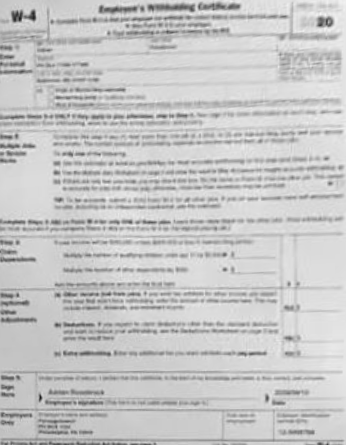

In [176]:
cv2_imshow(aligned)

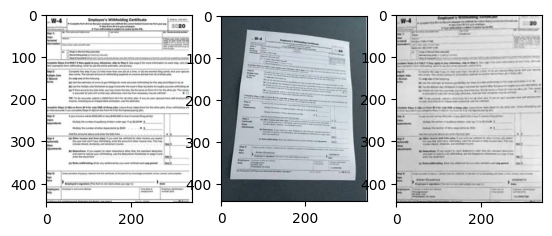

In [177]:
plt.subplot(1,3,1)
plt.imshow(ref, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(to_align, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(aligned, cmap='gray')
plt.show()